# Problem Statement :
#### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. They aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends.They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

#### Essentially the Company wants :
1. Which variables are significant in predicting the demand for shared bikes?
2. How well those variables describe the bike demands?

#### So interpretation is important !!


## The steps we will perform in this exercise are as follow :- 

1. Reading and understanding the data
2. Preparing the data
3. Training the model
4. Residual Analysis
5. Predictions and Evaluation on test set
6. Final conclusion and predictions
7. The best fit line

## Importing Important Libraries 

In [901]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings 
warnings.filterwarnings('ignore')

##### Step 1 : Reading and understanding the data

In [902]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [903]:
#checking missing values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [904]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## - No missing Values or suspicious data types

In [905]:
#how many number of columns and rows available in data set
df.shape

(730, 16)

In [906]:
#getting the deapth of data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [907]:
###### Removed redundant columns
#Instant is a index column, dteday has same information given in year and weekday. 
# The sum of casual and registered users has been calculated in Cnt, hence they are not useful. 
df.drop(['dteday','instant','casual','registered',], axis=1, inplace=True)

In [908]:
#reduced number of columns just to cross check
df.shape

(730, 12)

In [909]:
#changing columns name to make them look more relevant 
df.rename(columns={ 'yr' : 'Year', 'mnth' : 'Month', 'temp' : 'temperature' , 'hum' : 'humidity', 'cnt': 'Total Rent_Bike'}, 
          inplace=True)
df.columns

Index(['season', 'Year', 'Month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temperature', 'atemp', 'humidity', 'windspeed',
       'Total Rent_Bike'],
      dtype='object')

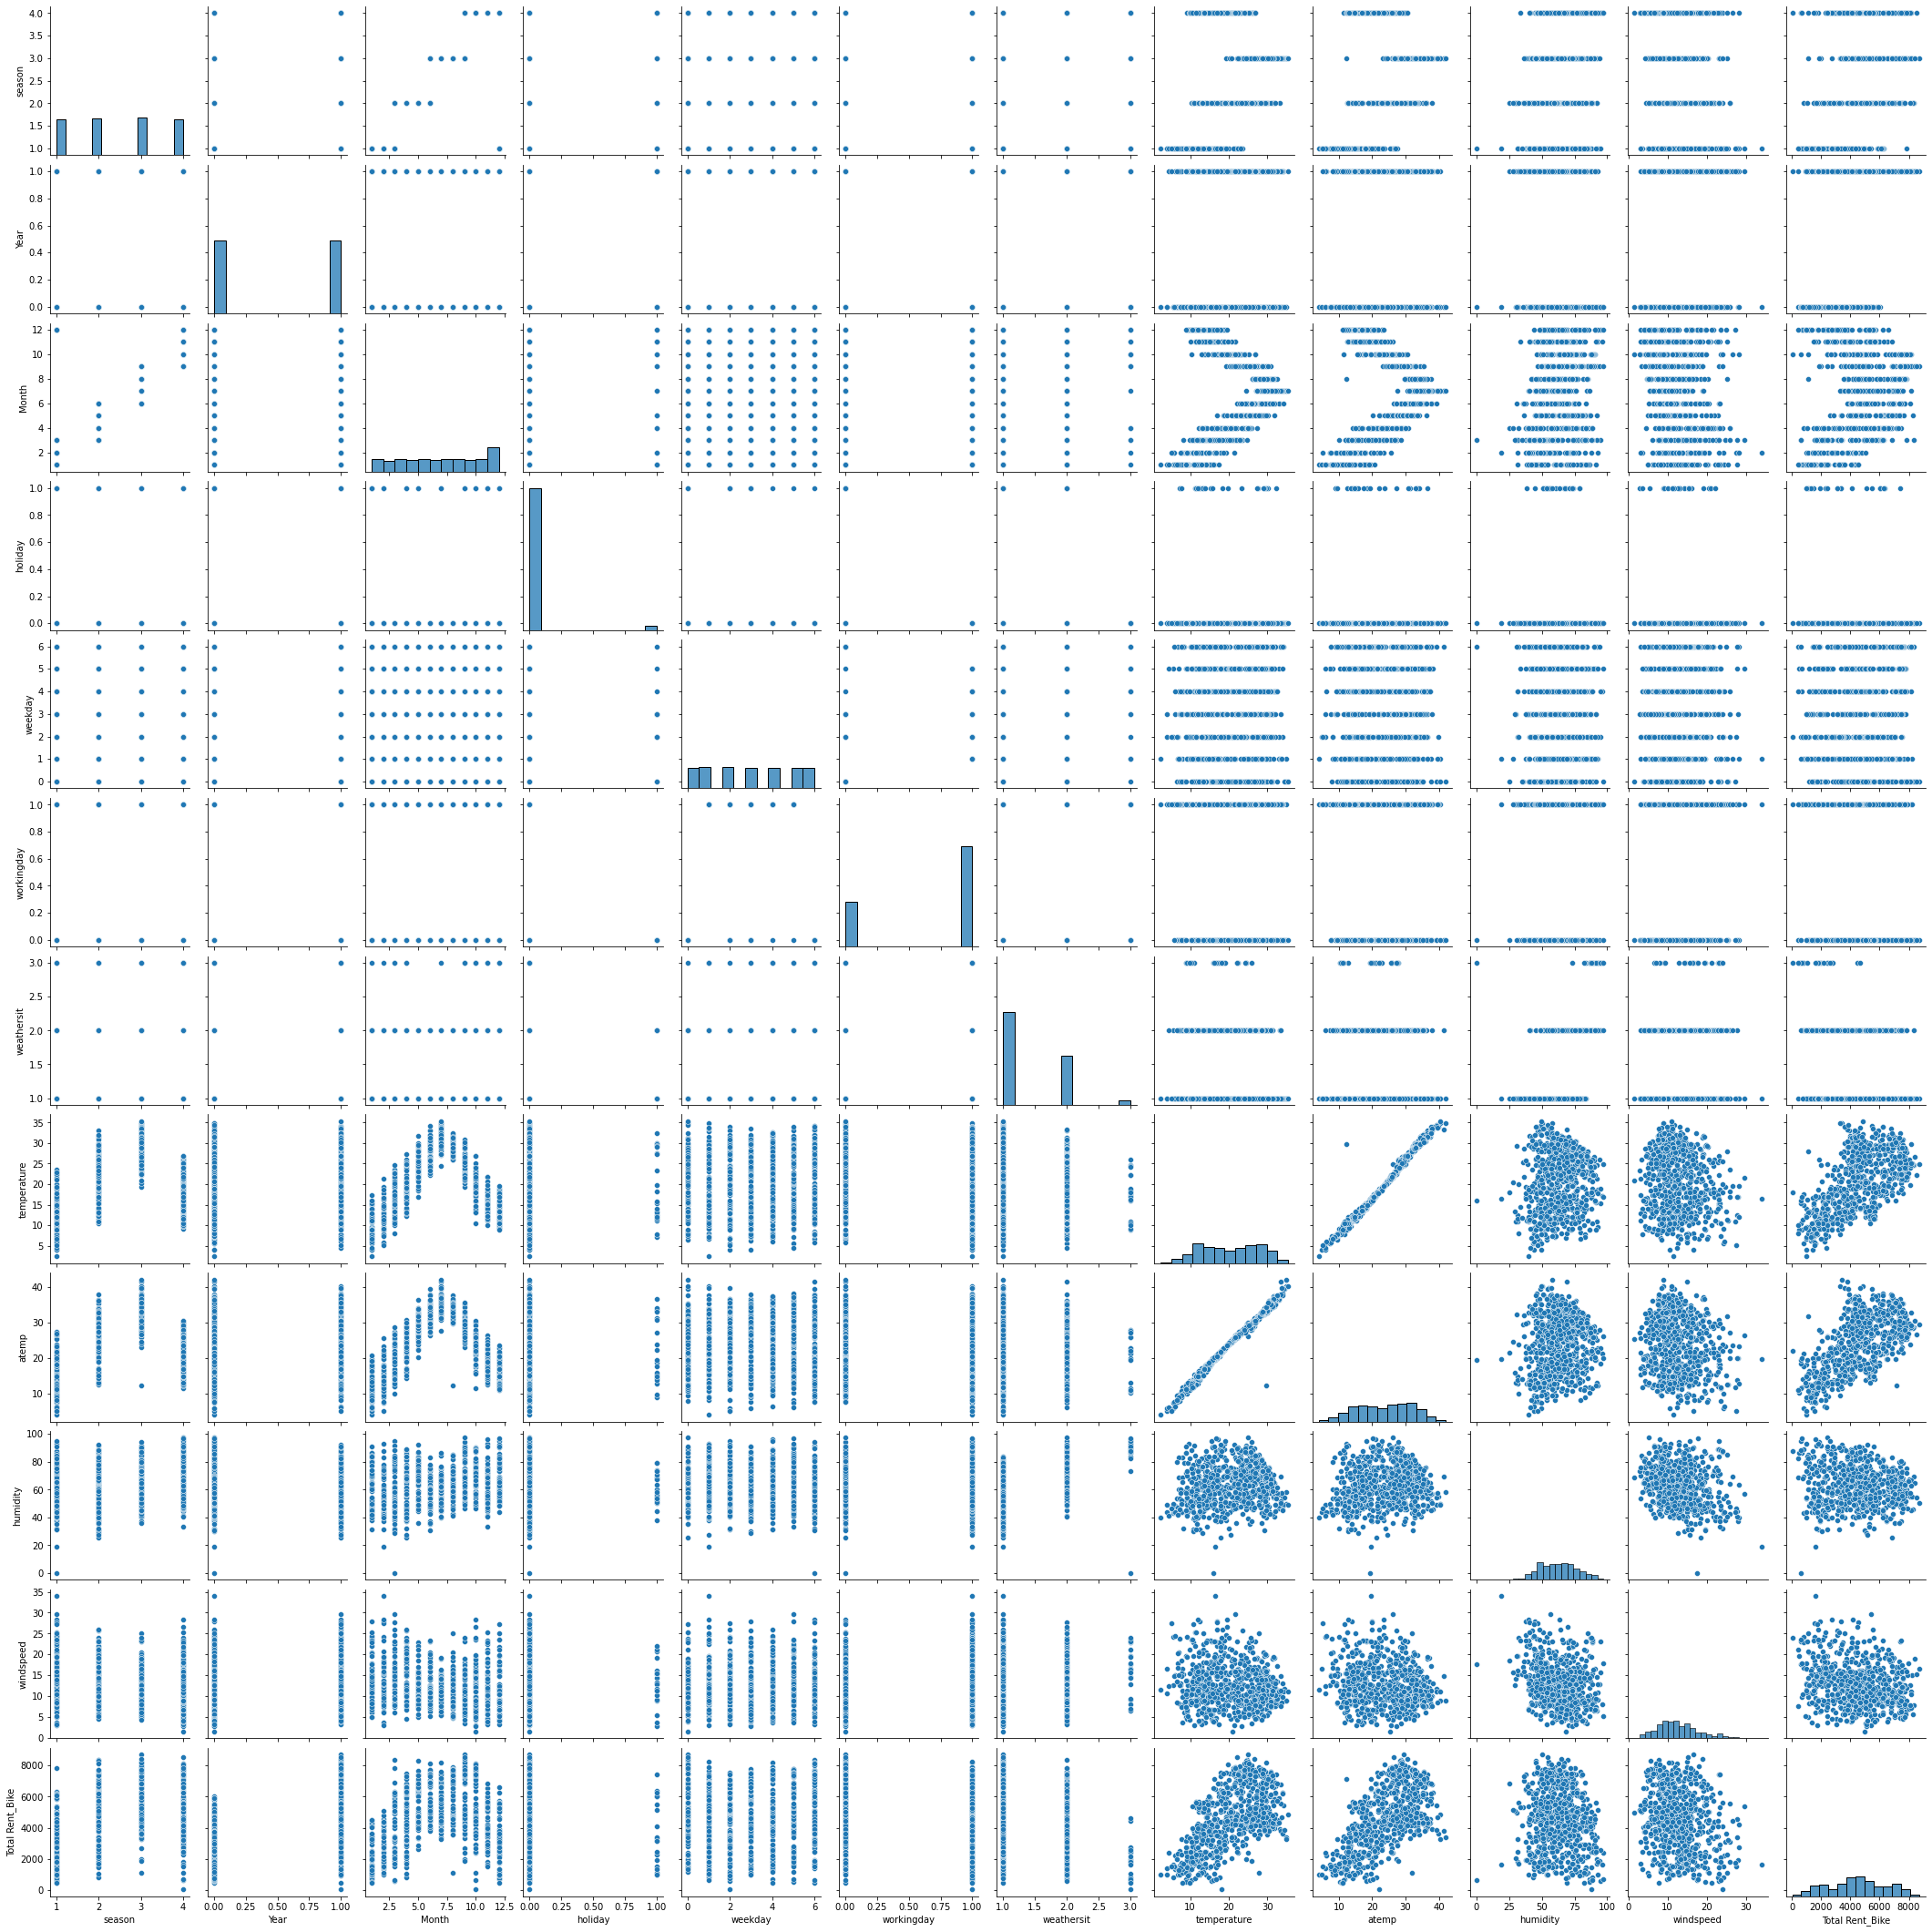

In [847]:
#some basic graphical representation before treating variables
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='Total Rent_Bike', ylabel='temperature'>

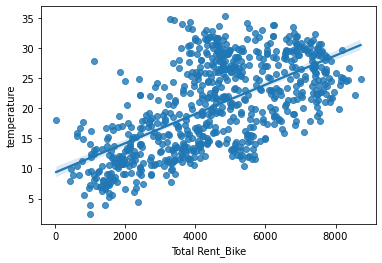

In [910]:
sns.regplot(x='Total Rent_Bike',y='temperature', data=df)
#temprature and dependent variables seems to have a positive correlation

<AxesSubplot:xlabel='Total Rent_Bike', ylabel='atemp'>

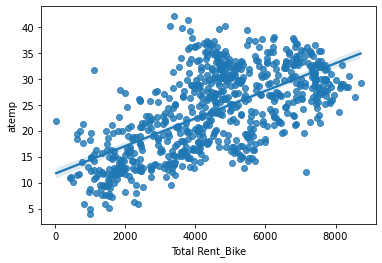

In [911]:
sns.regplot(x='Total Rent_Bike',y='atemp', data=df)
#sniffing some multicollinearity between temprature and atemp, but will treat them later

# checking outliers presence in data

<AxesSubplot:xlabel='workingday', ylabel='Total Rent_Bike'>

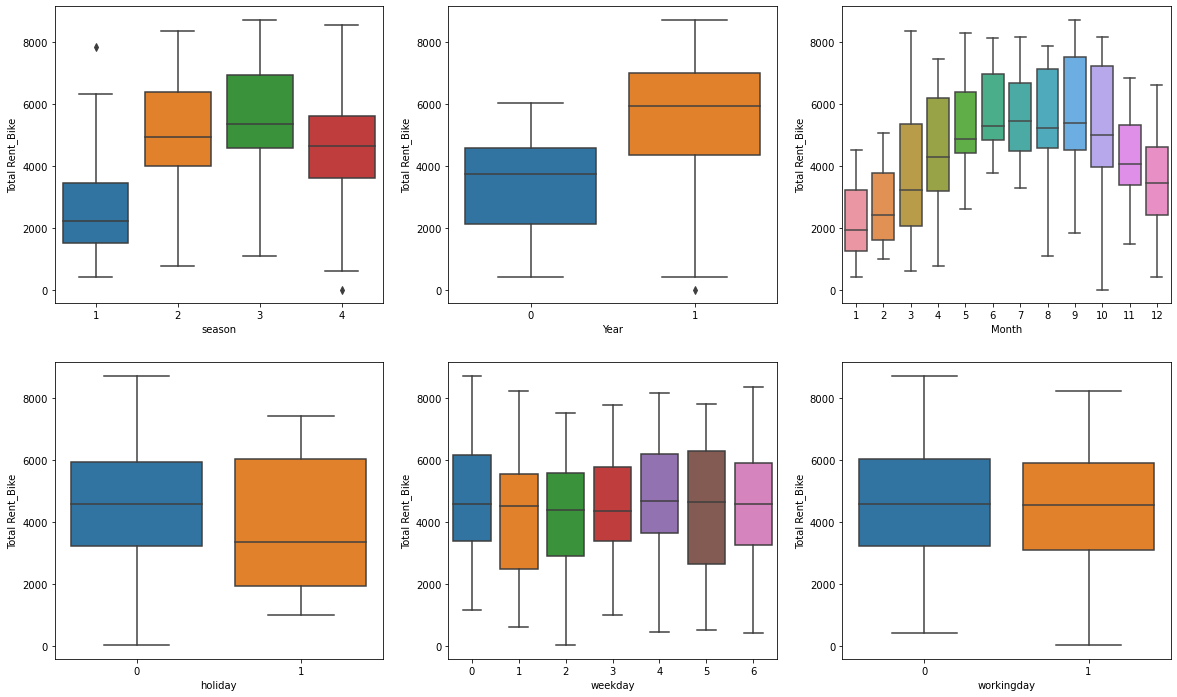

In [850]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='Total Rent_Bike',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Year', y='Total Rent_Bike',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Month', y='Total Rent_Bike',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='Total Rent_Bike',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='Total Rent_Bike',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='Total Rent_Bike',data=df)

### No outliers in the data,therefore no treatment given and can also use standard scaling

<AxesSubplot:xlabel='windspeed', ylabel='Total Rent_Bike'>

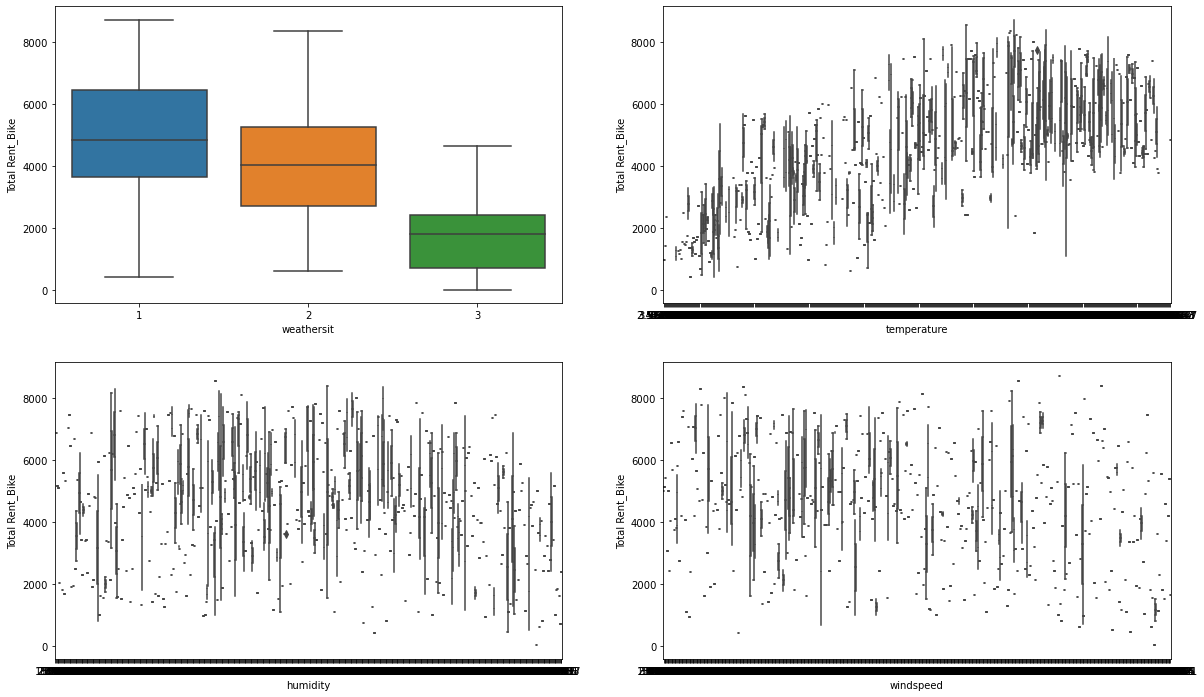

In [851]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x='weathersit', y='Total Rent_Bike',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='temperature', y='Total Rent_Bike',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='humidity', y='Total Rent_Bike',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='windspeed', y='Total Rent_Bike',data=df)


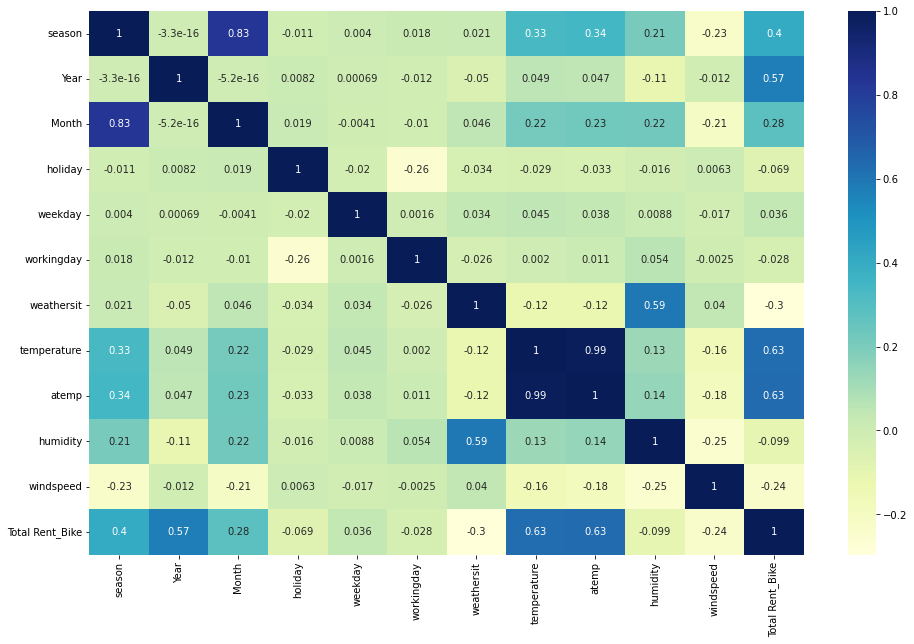

In [852]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()
#to understand correlations with help of heatmap, could visibly notice temrature and atemp are multicollinear, hence dropping one

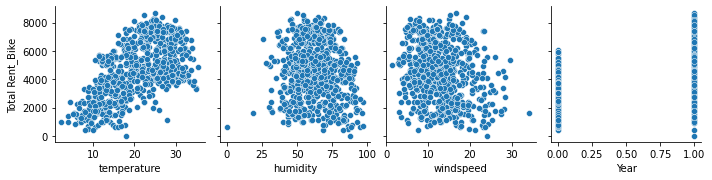

In [853]:
#to check relationship between numerical variables with dependent variable
sns.pairplot(df,x_vars=['temperature','humidity','windspeed','Year'],
            y_vars=['Total Rent_Bike'],
            )
plt.show()

In [912]:
#since temperature and atemp is highly co-related , dropping atemp
df.drop(['atemp'], axis=1, inplace=True)
df.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,Total Rent_Bike
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


### Preparing the data for modelling 
- Encoding
    - coverting variables into categorical string as per given data dictionary
    - Then converting them into dummies 
    

In [913]:
df['season']=df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
df['Month']=df.Month.map({1:'January',2:'Feburary',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',
                       9:'September',10:'October',11:'November', 12:'December'})
df['weekday']=df.weekday.map({1:'Monday', 2: 'Tuesday', 3:'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 
                       0:'Sunday'})
df['weathersit']=df.weathersit.map({1: 'Clear', 2:'Mist', 3:'Light Snow',4:'Snow + Fog'})
df.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,Total Rent_Bike
0,spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [914]:
df['weekday'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [915]:
df.weathersit.unique()

array(['Mist', 'Clear', 'Light Snow'], dtype=object)

In [916]:
df.Month.unique()

array(['January', 'Feburary', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [917]:
df.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

<AxesSubplot:xlabel='season', ylabel='Total Rent_Bike'>

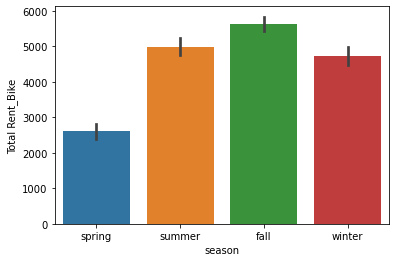

In [918]:
#analysing relation between season and target variable
sns.barplot('season','Total Rent_Bike',data=df)

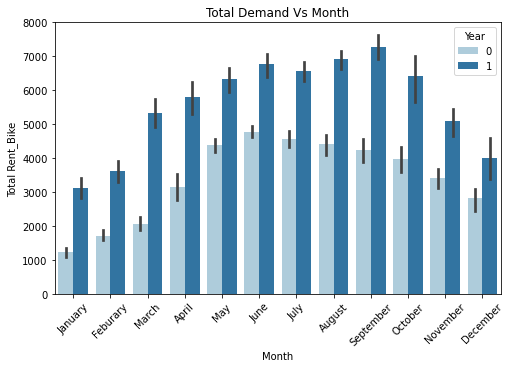

In [919]:
##analysing relation between Total Demand and target variable
plt.figure(figsize=(8,5))
plt.title("Total Demand Vs Month")
sns.barplot('Month','Total Rent_Bike',hue='Year',data=df,palette='Paired')
plt.xticks(rotation=45)
plt.show()


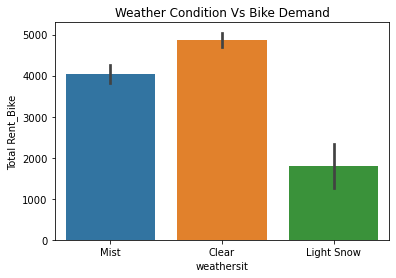

In [920]:
plt.title("Weather Condition Vs Bike Demand")
sns.barplot('weathersit','Total Rent_Bike',data=df)
plt.show()

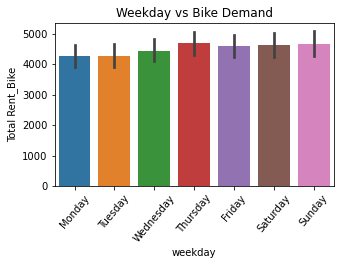

In [921]:
plt.figure(figsize=(5,3))
plt.title("Weekday vs Bike Demand")
plt.xticks(rotation=50)
sns.barplot('weekday','Total Rent_Bike',data=df)
plt.show()

In [922]:
months=pd.get_dummies(df.Month,drop_first=True)
weekday=pd.get_dummies(df.weekday,drop_first=True)
weathersit=pd.get_dummies(df.weathersit, drop_first=True)
season=pd.get_dummies(df.season, drop_first=True)

In [923]:
df=pd.concat([months,weekday,weathersit,season,df],axis=1)
df.head()

,August,December,Feburary,January,July,June,March,May,November,October,...,Year,Month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,Total Rent_Bike
0,0,0,0,1,0,0,0,0,0,0,...,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [924]:
df.drop(['Month','weekday','weathersit','season'], axis=1, inplace=True)
df.shape

(730, 29)

In [925]:
df.columns

Index(['August', 'December', 'Feburary', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Light Snow', 'Mist',
       'spring', 'summer', 'winter', 'Year', 'holiday', 'workingday',
       'temperature', 'humidity', 'windspeed', 'Total Rent_Bike'],
      dtype='object')

In [926]:
#checking other variables and nature of values, this is binary variable
df.holiday.unique()

array([0, 1], dtype=int64)

In [927]:
#another binary variable
df.workingday.unique()

array([1, 0], dtype=int64)

In [928]:
df.shape

(730, 29)

In [929]:
df.head()

,August,December,Feburary,January,July,June,March,May,November,October,...,spring,summer,winter,Year,holiday,workingday,temperature,humidity,windspeed,Total Rent_Bike
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


# Splitting into train and test
- Rescaling the variables

In [930]:
# dividing 70% data into train and remaining 30% to test the analysis, make predictions
df_train, df_test=train_test_split(df,train_size=0.7,random_state=100)

In [931]:
df_train.shape

(510, 29)

In [932]:
#although, we can use standard scaling also because there are no outliers in the data, but we preferred MinMax to put everything
#under 0 and 1
sacler=MinMaxScaler()
#list of numeric variable 
num_vars=['temperature' ,
          'humidity' , 'windspeed','Total Rent_Bike']

#fitting and transforming the variables

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,August,December,Feburary,January,July,June,March,May,November,October,...,spring,summer,winter,Year,holiday,workingday,temperature,humidity,windspeed,Total Rent_Bike
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [933]:
#extracting target variable to assign Y_train & remaining to X_train
y_train=df_train.pop('Total Rent_Bike')
X_train=df_train

In [934]:
#using RFE approach for feature selection and using automatic approach of dropping variables 
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [935]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('August', False, 9),
 ('December', True, 1),
 ('Feburary', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('March', False, 14),
 ('May', False, 8),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [936]:
col=X_train.columns[rfe.support_]
col

Index(['December', 'January', 'July', 'November', 'September', 'Light Snow',
       'Mist', 'spring', 'summer', 'winter', 'Year', 'holiday', 'temperature',
       'humidity', 'windspeed'],
      dtype='object')

In [937]:
X_train.columns[~rfe.support_]

Index(['August', 'Feburary', 'June', 'March', 'May', 'October', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'workingday'],
      dtype='object')

In [938]:
X_train_rfe=X_train[col]

In [939]:
#first model with 15 variables
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total Rent_Bike   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          8.15e-189
Time:                        15:18:23   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3197      0.036      8.859      0.000       0.249       0.391
December       -0.0355      0.018     -2.024      0.043      -0.070      -0.001
January        -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July           -0.0553      0.018     -3.030      0.003      -0.091      -0.019
November       -0.0387      0.019     -2.057      0.040      -0.076      -0.002
September       0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow     -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist           -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring         -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer          0.0423      0.015      2.761      0.006       0.012       0.072
winter          0.1019      0.018      5.656      0.000       0.067       0.137
Year            0.2304      0.008     28.487      0.000       0.215       0.246
holiday        -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temperature     0.4815      0.037     13.005      0.000       0.409       0.554
humidity       -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed      -0.1887      0.026     -7.315      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [940]:
vif=pd.DataFrame()
vif['feature']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,feature,vif
0,const,82.52
8,spring,5.27
13,temperature,4.42
10,winter,3.83
9,summer,2.77
14,humidity,1.92
4,November,1.77
2,January,1.68
7,Mist,1.57
1,December,1.50


## Reducing Columns to 10 using RFE again

In [948]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe_new=RFE(lm,10)
rfe_new=rfe_new.fit(X_train,y_train)
list(zip(X_train.columns,rfe_new.support_,rfe_new.ranking_))

[('August', False, 14),
 ('December', False, 6),
 ('Feburary', False, 7),
 ('January', False, 4),
 ('July', True, 1),
 ('June', False, 16),
 ('March', False, 19),
 ('May', False, 13),
 ('November', False, 5),
 ('October', False, 17),
 ('September', True, 1),
 ('Monday', False, 12),
 ('Saturday', False, 9),
 ('Sunday', False, 10),
 ('Thursday', False, 18),
 ('Tuesday', False, 11),
 ('Wednesday', False, 15),
 ('Light Snow', True, 1),
 ('Mist', False, 3),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [949]:
col=X_train.columns[rfe_new.support_]
col

Index(['July', 'September', 'Light Snow', 'summer', 'winter', 'Year',
       'holiday', 'temperature', 'humidity', 'windspeed'],
      dtype='object')

In [950]:
X_train.columns[~rfe_new.support_]

Index(['August', 'December', 'Feburary', 'January', 'June', 'March', 'May',
       'November', 'October', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Mist', 'spring', 'workingday'],
      dtype='object')

In [951]:
X_train_rfe_new=X_train[col]

In [952]:
X_train_rfe_new=sm.add_constant(X_train_rfe_new)
lm=sm.OLS(y_train,X_train_rfe_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total Rent_Bike   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          2.79e-186
Time:                        15:19:51   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2682      0.026     10.292      0.000       0.217       0.319
July           -0.0482      0.018     -2.606      0.009      -0.085      -0.012
September       0.0944      0.016      5.724      0.000       0.062       0.127
Light Snow     -0.1914      0.026     -7.470      0.000      -0.242      -0.141
summer          0.0800      0.011      7.281      0.000       0.058       0.102
winter          0.1390      0.011     12.903      0.000       0.118       0.160
Year            0.2259      0.008     27.118      0.000       0.210       0.242
holiday        -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temperature     0.6200      0.023     27.492      0.000       0.576       0.664
humidity       -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed      -0.2059      0.026     -7.889      0.000      -0.257      -0.155
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF
##### We could have
- high P value, high VIF
- high-low :
    - high P, low VIF (Remove These First)
    - Low p, high VIF (remove after first one)
- Low P and low VIF (Keep it)


In [953]:
vif=pd.DataFrame()
vif['feature']=X_train_rfe_new.columns
vif['vif']=[variance_inflation_factor(X_train_rfe_new.values,i) for i in range(X_train_rfe_new.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,feature,vif
0,const,40.19
8,temperature,1.53
1,July,1.43
4,summer,1.33
5,winter,1.28
9,humidity,1.26
2,September,1.19
10,windspeed,1.16
3,Light Snow,1.11
6,Year,1.03


#### Residual Analysis 

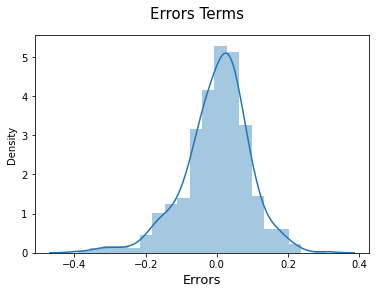

In [954]:
y_train_pred=lm.predict(X_train_rfe_new)
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=20)
fig.suptitle('Errors Terms',fontsize=15)
plt.xlabel('Errors', fontsize=13)
plt.show()

## Prediction and Evaluation on Test set
- Applying the scaling on the test set

In [955]:
num_vars=['temperature' ,
          'humidity' , 'windspeed','Total Rent_Bike']
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.describe()

,August,December,Feburary,January,July,June,March,May,November,October,...,spring,summer,winter,Year,holiday,workingday,temperature,humidity,windspeed,Total Rent_Bike
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [956]:
y_test=df_test.pop('Total Rent_Bike')
X_test=df_test
X_test.head()

,August,December,Feburary,January,July,June,March,May,November,October,...,Mist,spring,summer,winter,Year,holiday,workingday,temperature,humidity,windspeed
184,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0.831783,0.657364,0.084219
535,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0.901354,0.610133,0.153728
299,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0.511964,0.837699,0.334206
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
152,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0.817246,0.314298,0.537414


In [957]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: Total Rent_Bike, Length: 220, dtype: float64

In [958]:
X_test_new=X_test[col]

In [959]:
X_test_new=sm.add_constant(X_test_new)

In [960]:
y_test_pred=lm.predict(X_test_new)

## Test Model Evaluation 

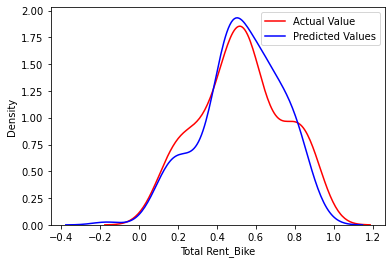

In [961]:
# Plotting Actual Value Vs Predicted Values
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.legend()
plt.show()

Inferences :
Actual value and predicted value follow similar curve pattern.
It shows that the model is good enough to predict the count of rentak bikes.

In [962]:
Test_score=r2_score(y_true=y_test,y_pred=y_test_pred)
round(Test_score,4)

0.8038

In [963]:
#Calculate the r square for train
r_squared_train = r2_score(y_train, y_train_pred)
round(r_squared_train,4)

0.8323

#### Inference 
- R2 model is 80% 

In [964]:
Difference_bw_r2=0.834-Test_score
Difference_bw_r2
#it has to be less than 0.05 to confirm that it is a good model 


0.030179839919757145

In [965]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8038201600802428

In [966]:
0.05-Difference_bw_r2

0.019820160080242857

#### Equation of best fitted line

In [967]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total Rent_Bike   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          2.79e-186
Time:                        15:20:46   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2682      0.026     10.292      0.000       0.217       0.319
July           -0.0482      0.018     -2.606      0.009      -0.085      -0.012
September       0.0944      0.016      5.724      0.000       0.062       0.127
Light Snow     -0.1914      0.026     -7.470      0.000      -0.242      -0.141
summer          0.0800      0.011      7.281      0.000       0.058       0.102
winter          0.1390      0.011     12.903      0.000       0.118       0.160
Year            0.2259      0.008     27.118      0.000       0.210       0.242
holiday        -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temperature     0.6200      0.023     27.492      0.000       0.576       0.664
humidity       -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed      -0.2059      0.026     -7.889      0.000      -0.257      -0.155
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Equation
- cnt= (-0.0482 july)+(0.0944 September)+(-0.1914 Light Snow)+(0.0800 summer)+(0.1390winter)+(0.2259Year)+(-0.0930holiday)
      +(0.6200temperature)+(-0.2868humidity)+(-0.2059 windspeed)
      
#### Count of rental bikes depend on following features. 
- July
- September
- Light Snow
- summer
- winter
- Year
- holiday
- temperature
- humidity
- windspeed